# **Insurance Dataset**

In the below implementations, I have used the [`insurance.csv` dataset](https://www.kaggle.com/awaiskaggler/insurance-csv). This dataset gives an idea about the insurance coverage of a person based on certain characteristics of that person. These characterics have been given as **features** and there are total ${1338}$ instances.

- `Age` : $\in \mathbb{Z}$
- `Sex` : $\{Male=0, Female=1\}$ 
- `BMI` : $\in \mathbb{R}$
- `Children` : $\in \mathbb{Z}$
- `Smoker` : $\{No=0, Yes=1\}$
- `Region` : $\{Northwest=0, Southwest=1\}$

The value that has to be predicted is the `Insurance Charges` which takes continuous values $(\in \mathbb{R})$

In [ ]:
import pandas as pd
df = pd.read_csv('./datasets/insurance.csv')
df.head(5)

# **Linear Regression using Gradient descent**

As the dataset is having more than one feature, I have used **Batch Gradient Descent** algorithm for updating the weight vector represented by $\underline w$.

I have implemented each steps seperately and then I have used the inbuilt **`LinearRegression()`** from **`sklearn`** to compare the scores.

## Preprocessing Task

There are some features which are categorical and take binary values. So the values have been converted into numerical values i.e. 0 and 1.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./datasets/insurance.csv')
print(df.head(5))

le = LabelEncoder()

le.fit(df['sex'])
df['sex'] = le.transform(df['sex'])

le.fit(df['smoker'])
df['smoker'] = le.transform(df['smoker'])

le.fit(df['region'])
df['region'] = le.transform(df['region'])

print(df.head(5))

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
   age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86


## Preparing Train and Test data

The dataset is split into Train and Test set in ratio $70:30$ i.e. ${70\%}$ in Train set and ${30\%}$ in Test set.

In [ ]:
import numpy as np
import pandas as pd

X = np.array([df.loc[i][:-1] for i in range(len(df))])
Y = np.array(df['expenses'])

size = len(df)
random_indice = np.random.permutation(size)
num_train = int(size*0.7)
num_test = int(size*0.3)

X_train = X[random_indice[:num_train]]
y_train = Y[random_indice[:num_train]]
X_test = X[random_indice[-num_test:]]
y_test = Y[random_indice[-num_test:]]

## Implementation of steps

$size$ represents the total number of training instances, $\alpha = 0.0001$ and number of iterations = $10^5$

1. Start with some $\underline w$
2. Repeat until convergence (very large number of iterations)
    1.  $\underline h = <\underline w, \underline x>$
    2.  $cost = \frac 12 \times size \times \sum{(\underline h - \underline y)^2}$
    3.  $\underline d_w = \frac {d(cost)}{dw} = \frac{1}{size} \times (<(\underline h - \underline y), \underline x>)$
    4.  $\underline w = \underline w - \alpha \times \underline d_w$

Because I am calculating the inner product, so it is same as taking each training instances, multiplying with weight coefficients and taking the sum. Therefore, we get the derivatives in $\underline d_w$ as a vector and hence the updated weights can easily be obtained in Step $2.4$

In [ ]:
import random
w = [random.random() for _ in range(len(X_train[0]))]
print("Initial weight : ",w)

alpha = 0.0001
epoch = 100000

cost = []
for i in range(epoch):
  h = np.inner(w, X_train) # w=(1,6)  X_train=(n, 6)  h=(n,1)
  cost.append(0.5*num_train*(np.sum(np.square(h - y_train))))
  d_w = (1/num_train)*(np.inner(h - y_train, np.transpose(X_train))) #d_w=(1,6)
  w = w - alpha*np.transpose(d_w)

print("Final weight : ",w)

Initial weight :  [0.8722695306496072, 0.7234165689405115, 0.10330294880805713, 0.09944336245092544, 0.983344204336581, 0.7163423787420305]
Final weight :  [  214.35834607  -435.83863553    71.5076554    334.09112023
 18526.56149504  -683.48450528]


## Prediction and calculating $R^2$ score

Prediction has been done by applying updated weights on test set. The observed $R^2$ score is = $0.6968$

In [ ]:
y_pred = np.inner(w, X_test)
u = sum((y_pred - y_test)**2)
v = sum((y_test - np.mean(y_test))**2)
r2 = 1 - (u/v)
print("Score : "+str(r2))

Score : 0.6968352930500166


## Epoch-Cost plot

From the plot below, the cost can be easily seen reducing at the end.

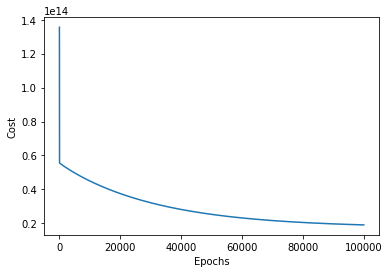

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(epoch), cost)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

## Comparison with Scikits-learn's `LinearRegression()`

Using the inbuilt `LinearRegression()` in `Scikits-learn`, the obtained $R^2$ score on the same test set is $0.7480$, which is close to the $R^2$ score obtained above.

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
print("Score : "+str(clf.score(X_test, y_test)))

Score : 0.748009421569502


# **Linear Regression using Pseudo-inverse method**

It is a very straight-forward method to calculate the weight from given Train set. The general method is,

$\underline x \times \underline w=\underline y$

therefore, the unknown weights can be calculated as,

$\underline w = \underline x^{-1} \times \underline y$

If $\underline x$ is not invertible, then the pseudo-inverse is calculated.


## Preprocessing Task

There are some features which are categorical and take binary values. So the values have been converted into numerical values i.e. 0 and 1.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./datasets/insurance.csv')
print(df.head(5))

le = LabelEncoder()

le.fit(df['sex'])
df['sex'] = le.transform(df['sex'])

le.fit(df['smoker'])
df['smoker'] = le.transform(df['smoker'])

le.fit(df['region'])
df['region'] = le.transform(df['region'])

print(df.head(5))

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
   age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86


## Preparing Train and Test data

The dataset is split into Train and Test set in ratio $70:30$ i.e. ${70\%}$ in Train set and ${30\%}$ in Test set.



In [ ]:
import numpy as np
import pandas as pd

X = np.array([df.loc[i][:-1] for i in range(len(df))])
Y = np.array(df['expenses'])

size = len(df)
random_indice = np.random.permutation(size)
num_train = int(size*0.7)
num_test = int(size*0.3)

X_train = X[random_indice[:num_train]]
y_train = Y[random_indice[:num_train]]
X_test = X[random_indice[-num_test:]]
y_test = Y[random_indice[-num_test:]]

## Calculation of $\underline w = \underline x^{-1} \times \underline y$

In [ ]:
if len(X_train)!=len(X_train[0]) or np.linalg.det(X_train)==0:
  w1 = np.matmul(np.linalg.pinv(X_train), np.transpose(y_train))
else :
  w1 = np.matmul(np.transpose(y_train), np.linalg.inv(X_train))

## Prediction and calculating $R^2$ score

Prediction has been done by applying updated weights on test set. The observed $R^2$ score is $\approx 0.73$

In [ ]:
y_pred = np.inner(w1, X_test)
u = sum((y_pred - y_test)**2)
v = sum((y_test - np.mean(y_test))**2)
r2 = 1 - (u/v)
print("Score : "+str(r2))

Score : 0.7299369857918232


## Comparison with Scikits-learn's `LinearRegression()`

Using the inbuilt `LinearRegression()` in `Scikits-learn`, the obtained $R^2$ score on the same test set is $\approx 0.76$, which is close to the $R^2$ score obtained above.

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
print("Score : "+str(clf.score(X_test, y_test)))

Score : 0.7615234860015696
